In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib as mpl
import itertools as it
import argparse as ap
import statannot
pd.set_option('display.max_columns', 100)

In [8]:
microCtab = pd.read_csv("../MicroC/microC_roi_cov_new.tsv", sep='\t')
microCtab

,Unnamed: 0,x1,x2,y1,y2,WT_balanced_sum,WT_balanced_mean,WT_un_balanced_sum,WT_un_balanced_mean,KO_balanced_sum,KO_balanced_mean,KO_un_balanced_sum,KO_un_balanced_mean,WT_1_balanced_sum,WT_1_balanced_mean,WT_1_un_balanced_sum,WT_1_un_balanced_mean,WT_2_balanced_sum,WT_2_balanced_mean,WT_2_un_balanced_sum,WT_2_un_balanced_mean,WT_3_balanced_sum,WT_3_balanced_mean,WT_3_un_balanced_sum,WT_3_un_balanced_mean,KO_1_balanced_sum,KO_1_balanced_mean,KO_1_un_balanced_sum,KO_1_un_balanced_mean,KO_2_balanced_sum,KO_2_balanced_mean,KO_2_un_balanced_sum,KO_2_un_balanced_mean,KO_3_balanced_sum,KO_3_balanced_mean,KO_3_un_balanced_sum,KO_3_un_balanced_mean,bins_num
0,zone1a,114471105,114492784,114655000,114666183,0.354999,0.001479,80,0.303030,0.498702,0.002187,111,0.420455,0.337403,0.001406,31,0.117424,0.413026,0.001912,22,0.083333,0.297678,0.001240,27,0.102273,0.586739,0.002573,38,0.143939,0.479001,0.002101,40,0.151515,0.472484,0.002072,33,0.125000,264
1,zone1b,114453981,114466981,114655000,114666183,0.567201,0.003376,230,1.369048,0.682980,0.004065,250,1.488095,0.569791,0.003392,89,0.529762,0.669774,0.003987,57,0.339286,0.498067,0.002965,84,0.500000,0.581718,0.003463,65,0.386905,0.576443,0.003431,87,0.517857,0.911739,0.005427,98,0.583333,168
2,zone2a,114471105,114492784,114559230,114577582,0.521349,0.001372,175,0.418660,0.389117,0.001078,140,0.334928,0.442442,0.001164,64,0.153110,0.471433,0.001455,38,0.090909,0.545069,0.001434,73,0.174641,0.349370,0.000968,38,0.090909,0.420561,0.001165,58,0.138756,0.396988,0.001161,44,0.105263,418
3,zone2b,114453981,114466981,114559230,114577582,0.883538,0.003322,430,1.616541,0.290255,0.001091,137,0.515038,0.906584,0.003408,168,0.631579,0.781590,0.003102,85,0.319549,0.873229,0.003283,177,0.665414,0.415798,0.001563,51,0.191729,0.234635,0.000882,50,0.187970,0.222728,0.000884,36,0.135338,266
4,zone3,114559230,114577582,114655000,114666183,0.564269,0.002475,172,0.754386,0.249857,0.001096,97,0.425439,0.538841,0.002363,62,0.271930,0.620828,0.002874,42,0.184211,0.545893,0.002394,68,0.298246,0.245281,0.001076,29,0.127193,0.251384,0.001103,40,0.175439,0.244905,0.001134,28,0.122807,228
5,zone4,114453981,114466175,114491704,114496937,0.332120,0.003954,180,2.142857,0.210441,0.002505,102,1.214286,0.293364,0.003492,61,0.726190,0.328588,0.003912,33,0.392857,0.371167,0.004419,86,1.023810,0.165712,0.001973,23,0.273810,0.224328,0.002671,42,0.500000,0.242648,0.002889,37,0.440476,84


In [9]:
contactsums = pd.DataFrame(columns=['regioncomb', 'replicate', 'treatment_time', 'pinteractions'])
# contactsums = contactsums.append({'regioncomb': microCtab.loc[0][0], 'replicate': 1, 'treatment_time': 'ctrl', 'pinteractions': microCtab.WT_balanced_sum[0]}, ignore_index=True)
for i in range(0, len(microCtab)):
	for repl in range(1, 4):
		contactsums = contactsums.append({'regioncomb': microCtab.loc[i][0], 'replicate': repl, 'treatment_time': 'ctrl', 'pinteractions': microCtab[f'WT_{repl}_balanced_sum'][i] / microCtab.bins_num[i] * 1000}, ignore_index=True)
		contactsums = contactsums.append({'regioncomb': microCtab.loc[i][0], 'replicate': repl, 'treatment_time': 'KO', 'pinteractions': microCtab[f'KO_{repl}_balanced_sum'][i] / microCtab.bins_num[i] * 1000}, ignore_index=True)
contactsums

,regioncomb,replicate,treatment_time,pinteractions
0,zone1a,1,ctrl,1.278042
1,zone1a,1,KO,2.222494
2,zone1a,2,ctrl,1.564494
3,zone1a,2,KO,1.814398
4,zone1a,3,ctrl,1.127568
5,zone1a,3,KO,1.789713
6,zone1b,1,ctrl,3.391614
7,zone1b,1,KO,3.462607
8,zone1b,2,ctrl,3.986748
9,zone1b,2,KO,3.431210


zone1b_ctrl v.s. zone1b_KO: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-9.111e-01
zone1a_ctrl v.s. zone1a_KO: t-test independent samples with Bonferroni correction, P_val=1.871e-01 stat=-3.256e+00
zone2a_ctrl v.s. zone2a_KO: t-test independent samples with Bonferroni correction, P_val=3.497e-01 stat=2.628e+00
zone2b_ctrl v.s. zone2b_KO: t-test independent samples with Bonferroni correction, P_val=9.045e-03 stat=7.731e+00
zone3_ctrl v.s. zone3_KO: t-test independent samples with Bonferroni correction, P_val=1.550e-03 stat=1.221e+01
zone4_ctrl v.s. zone4_KO: t-test independent samples with Bonferroni correction, P_val=1.231e-01 stat=3.718e+00


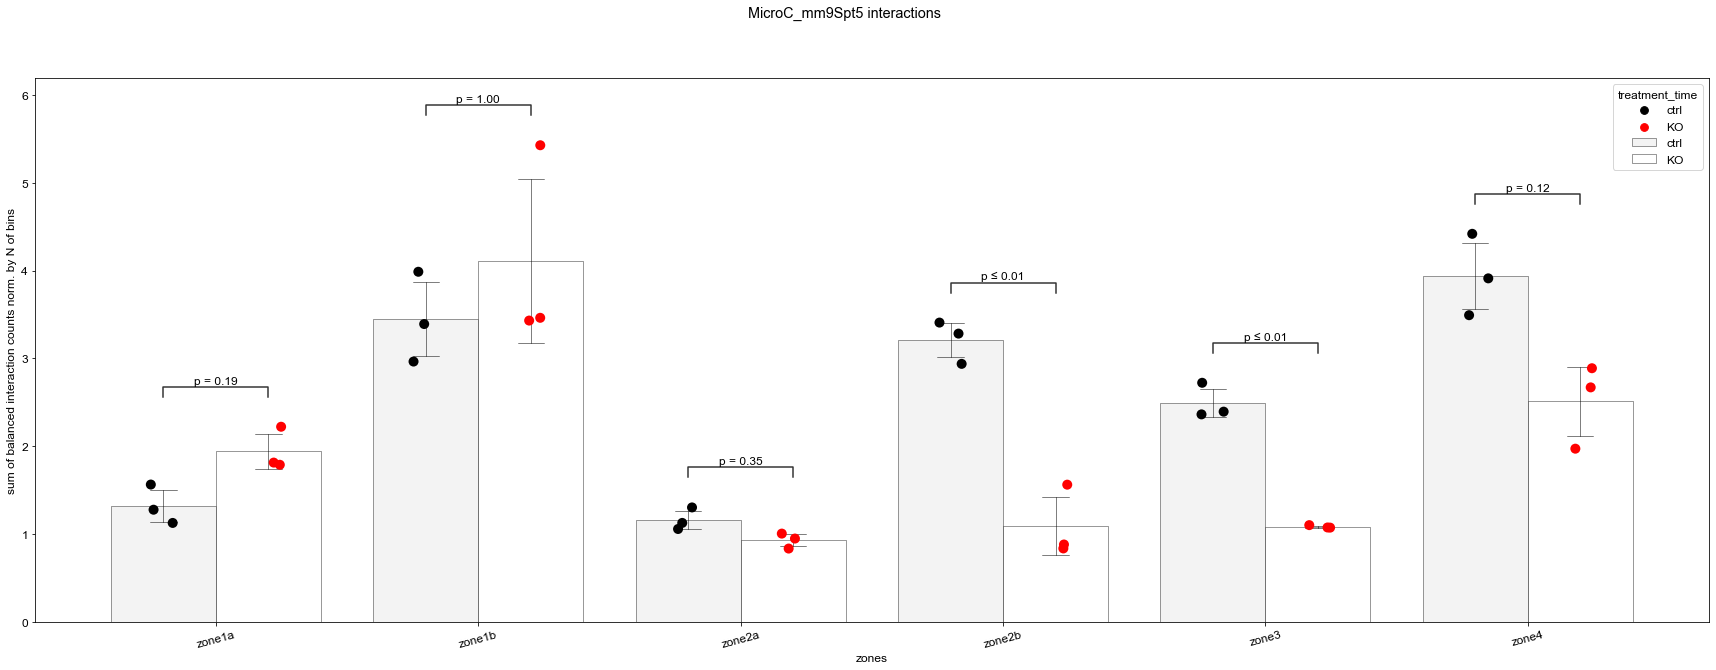

In [11]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 0.5

region_order = ['zone1a', 'zone1b', 'zone2a', 'zone2b', 'zone3', 'zone4']

fig = plt.figure(figsize=(30,10))

# maxInteraction = max(contactsums['pinteractions'])
# maxInteraction = maxInteraction + maxInteraction/10

ymax = max(contactsums['pinteractions']) +0.5

ax = fig.add_subplot(111)
sns.barplot(data=contactsums, x='regioncomb', y='pinteractions', hue='treatment_time', ci='sd', color='white', linewidth=0.5, edgecolor='black', 
	errcolor='black', errwidth=0.5, capsize=0.1, alpha=0.8, order=region_order, ax=ax)
sns.stripplot(data=contactsums, x='regioncomb', y='pinteractions', hue='treatment_time', ax=ax, dodge=True, size=10,
	order=region_order, palette=['black', 'red'])

boxlist = [] # list with pairs for statistical significance test
for reg in contactsums['regioncomb'].unique():
	boxlist = boxlist + [((reg, contactsums['treatment_time'].unique()[0]), (reg, contactsums['treatment_time'].unique()[1]))]
statannot.add_stat_annotation(ax, data=contactsums, x='regioncomb', y='pinteractions', hue='treatment_time', box_pairs=boxlist, order=region_order, test='t-test_ind', text_format='simple', verbose=2)

handles, labels = ax.get_legend_handles_labels()
# ax.legend_.remove()
# ax.legend(handles, ['Spt5 deprived', 'ctrl'])
ax.set_ylabel('sum of balanced interaction counts norm. by N of bins')
ax.set_xlabel("zones")
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
fig.suptitle('MicroC_mm9Spt5 interactions')

fig.savefig('../MicroC/MicroC_mm9Spt5_RegOfInterest_allZones_combined.pdf')
